# Mushroom Project


In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
df=pd.DataFrame(data=df)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

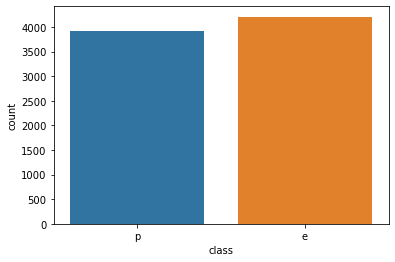

In [8]:
sns.countplot(df['class'])

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='cap-color', ylabel='count'>

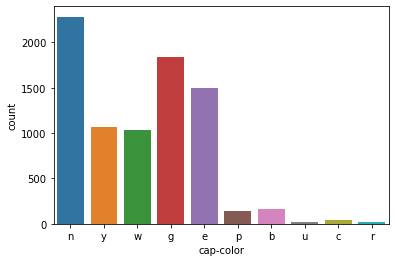

In [13]:
sns.countplot(df['cap-color'])

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

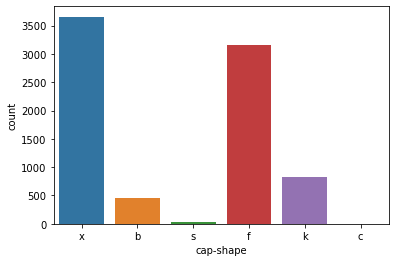

In [14]:
sns.countplot(df['cap-shape'])

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

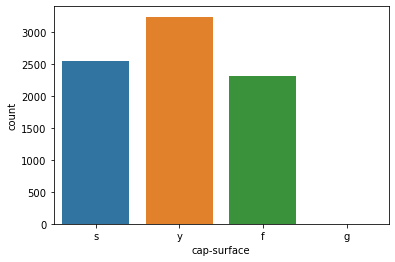

In [15]:
sns.countplot(df['cap-surface'])

<AxesSubplot:xlabel='bruises', ylabel='count'>

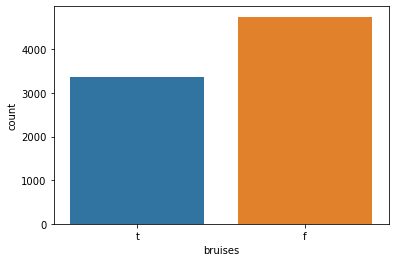

In [16]:
sns.countplot(df['bruises'])

<AxesSubplot:xlabel='odor', ylabel='count'>

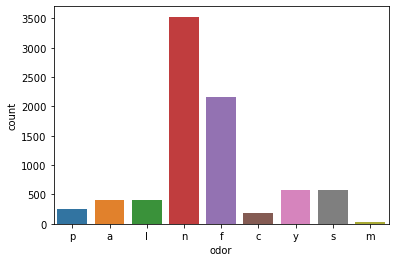

In [17]:
sns.countplot(df['odor'])

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

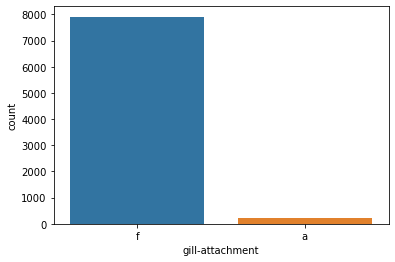

In [18]:
sns.countplot(df['gill-attachment'])

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

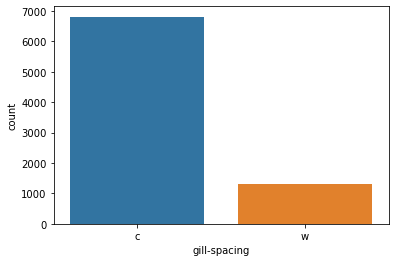

In [19]:
sns.countplot(df['gill-spacing'])

<AxesSubplot:xlabel='gill-size', ylabel='count'>

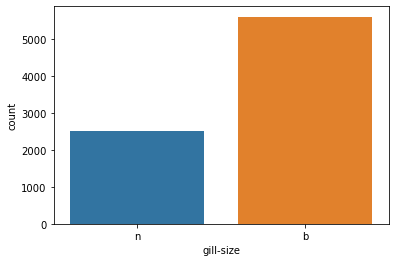

In [20]:
sns.countplot(df['gill-size'])

<AxesSubplot:xlabel='gill-color', ylabel='count'>

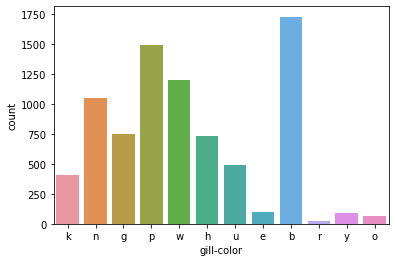

In [21]:
sns.countplot(df['gill-color'])

<AxesSubplot:xlabel='stalk-shape', ylabel='count'>

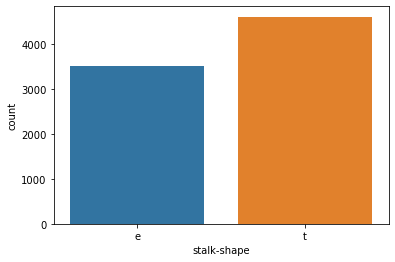

In [22]:
sns.countplot(df['stalk-shape'])

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

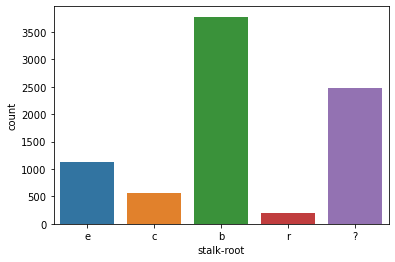

In [23]:
sns.countplot(df['stalk-root'])

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='count'>

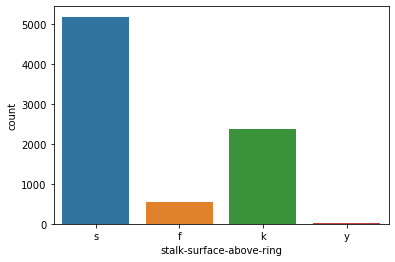

In [24]:
sns.countplot(df['stalk-surface-above-ring'])

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

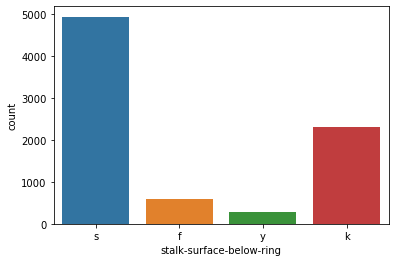

In [25]:
sns.countplot(df['stalk-surface-below-ring'])

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

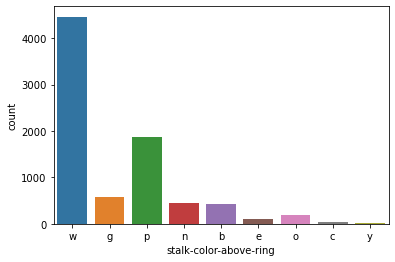

In [26]:
sns.countplot(df['stalk-color-above-ring'])

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

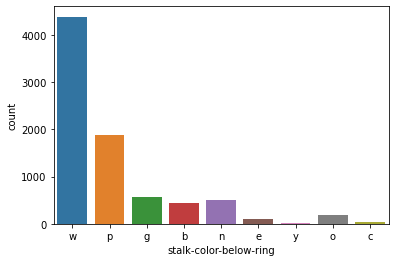

In [27]:
sns.countplot(df['stalk-color-below-ring'])

<AxesSubplot:xlabel='veil-type', ylabel='count'>

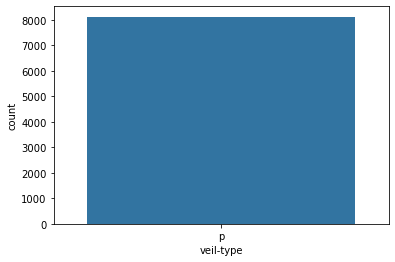

In [28]:
sns.countplot(df['veil-type'])

 In veil-type only one outcome is their so we drop this column. It has no relation with outcome

<AxesSubplot:xlabel='veil-color', ylabel='count'>

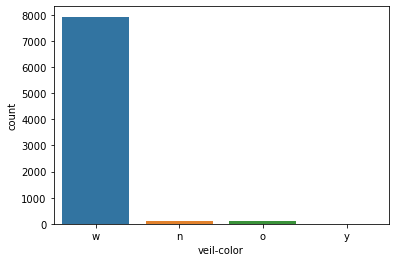

In [29]:
sns.countplot(df['veil-color'])

<AxesSubplot:xlabel='ring-number', ylabel='count'>

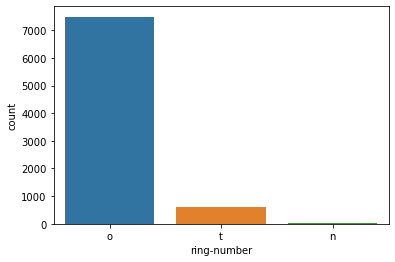

In [30]:
sns.countplot(df['ring-number'])

<AxesSubplot:xlabel='ring-type', ylabel='count'>

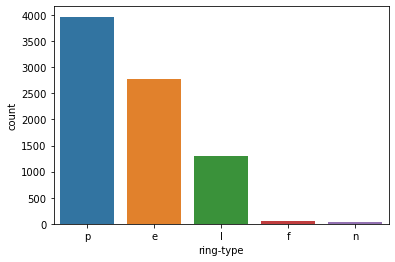

In [31]:
sns.countplot(df['ring-type'])

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

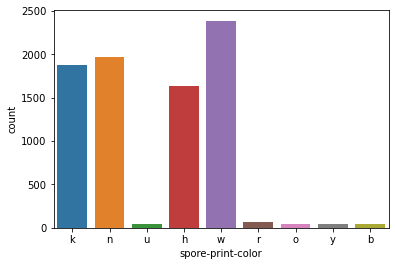

In [33]:
sns.countplot(df['spore-print-color'])

<AxesSubplot:xlabel='population', ylabel='count'>

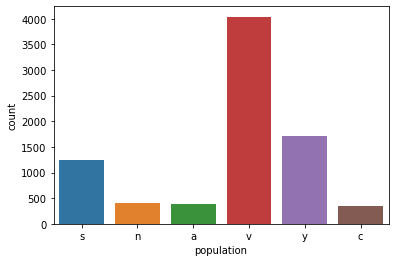

In [34]:
sns.countplot(df['population'])

<AxesSubplot:xlabel='habitat', ylabel='count'>

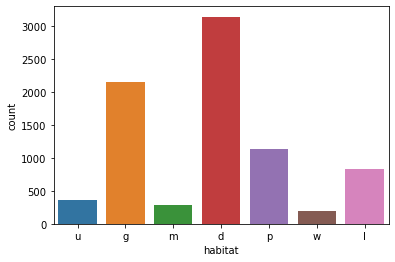

In [35]:
sns.countplot(df['habitat'])

In [36]:
df.drop(["veil-type"],axis=1,inplace=True)

In [37]:
df.shape

(8124, 22)

# Encoding

In [38]:
labellencoder=LabelEncoder()
for column in df.columns:
    df[column]=labellencoder.fit_transform(df[column])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [39]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [40]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

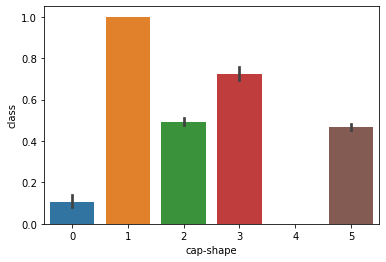

In [43]:
sns.barplot(x='cap-shape',y='class',data=df)

<AxesSubplot:xlabel='class', ylabel='cap-surface'>

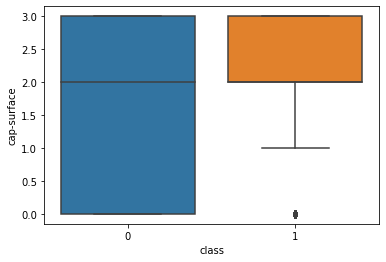

In [44]:
sns.boxplot(y='cap-surface',x='class',data=df)

<AxesSubplot:xlabel='bruises', ylabel='class'>

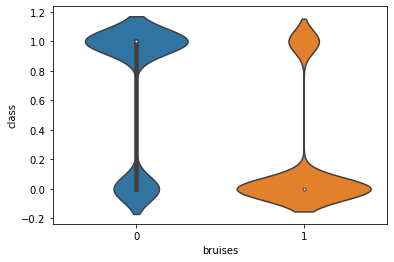

In [45]:
sns.violinplot(x='bruises',y='class',data=df)

<AxesSubplot:xlabel='class', ylabel='odor'>

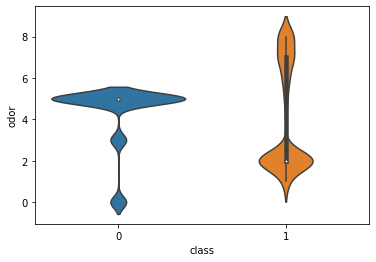

In [46]:
sns.violinplot(x='class',y='odor',data=df)

<AxesSubplot:xlabel='class', ylabel='gill-color'>

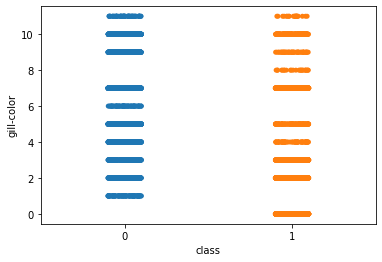

In [47]:
sns.stripplot(y='gill-color',x='class',data=df)

<AxesSubplot:xlabel='class', ylabel='stalk-shape'>

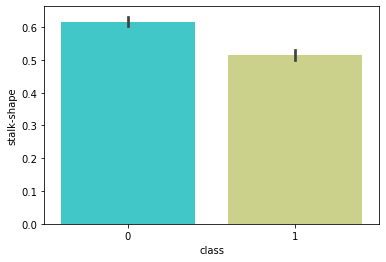

In [48]:
sns.barplot(x='class',y='stalk-shape',data=df, palette='rainbow')

<AxesSubplot:xlabel='class', ylabel='stalk-root'>

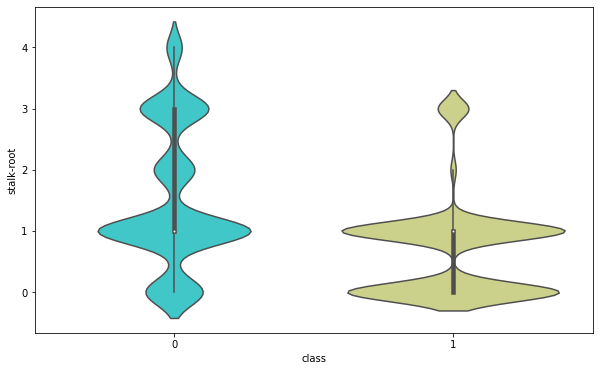

In [49]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y="stalk-root",data=df, palette='rainbow')

<AxesSubplot:xlabel='class', ylabel='stalk-surface-below-ring'>

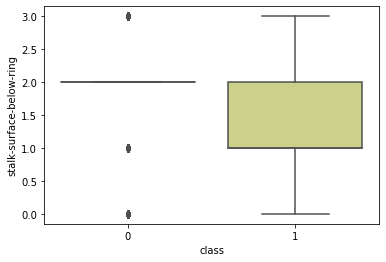

In [50]:
sns.boxplot(x='class',y='stalk-surface-below-ring',data=df, palette='rainbow')

<AxesSubplot:xlabel='class', ylabel='veil-color'>

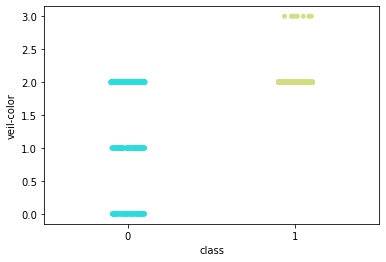

In [51]:
sns.stripplot(x='class',y='veil-color',data=df, palette='rainbow')

<AxesSubplot:xlabel='class', ylabel='spore-print-color'>

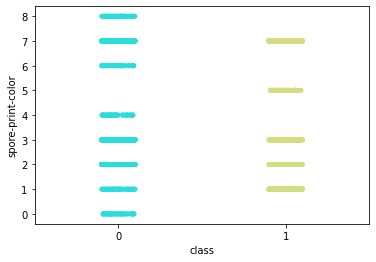

In [52]:
sns.stripplot(x='class',y='spore-print-color',data=df, palette='rainbow')

In [53]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

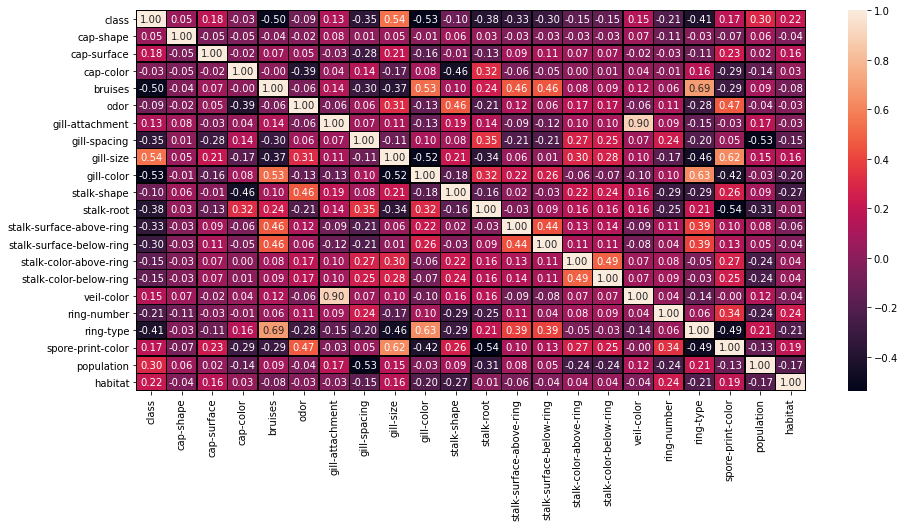

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


Outcome of Correlation Some columns in dataset are positively and some are negatively correlated. bruises has -0.5 correlation with outcome

Max correlation:- gill-size Min correlation:- gill-color



# Splitting the dataframe

In [57]:
x=df.iloc[:,1:22]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [58]:
y=df.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [118]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 13 The model performs very well
At random state:- 13
Training score is:- 80.47391906447146
Testing score is:- 80.49230769230769
At random state 26 The model performs very well
At random state:- 26
Training score is:- 80.67394983843668
Testing score is:- 80.73846153846154
At random state 67 The model performs very well
At random state:- 67
Training score is:- 81.04323742114171
Testing score is:- 81.04615384615384
At random state 75 The model performs very well
At random state:- 75
Training score is:- 80.73549776888753
Testing score is:- 80.67692307692307
At random state 78 The model performs very well
At random state:- 78
Training score is:- 80.48930604708417
Testing score is:- 80.49230769230769
At random state 95 The model performs very well
At random state:- 95
Training score is:- 80.62778889059855
Testing score is:- 80.61538461538461
At random state 134 The model performs very well
At random state:- 134
Training score is:- 80.90475457762733
Testing score is:- 80.92307

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=0.20)

In [120]:
x_train.shape

(6499, 21)

In [121]:
x_test.shape

(1625, 21)

In [122]:
y_test.shape

(1625,)

In [123]:
y_train.shape

(6499,)

In [124]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8104615384615385
[[819  47]
 [261 498]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       866
           1       0.91      0.66      0.76       759

    accuracy                           0.81      1625
   macro avg       0.84      0.80      0.80      1625
weighted avg       0.83      0.81      0.81      1625



In [125]:
svc=SVC(kernel='rbf')
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 2 The model performs very well
At random state:- 2
Training score is:- 99.07678104323742
Testing score is:- 99.07692307692308
At random state 5 The model performs very well
At random state:- 5
Training score is:- 99.13832897368826
Testing score is:- 99.07692307692308
At random state 6 The model performs very well
At random state:- 6
Training score is:- 99.12294199107555
Testing score is:- 99.13846153846154
At random state 10 The model performs very well
At random state:- 10
Training score is:- 99.2152638867518
Testing score is:- 99.2
At random state 26 The model performs very well
At random state:- 26
Training score is:- 99.09216802585014
Testing score is:- 99.07692307692308
At random state 35 The model performs very well
At random state:- 35
Training score is:- 99.03062009539929
Testing score is:- 99.01538461538462
At random state 40 The model performs very well
At random state:- 40
Training score is:- 99.10755500846284
Testing score is:- 99.07692307692308
At random st

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)

In [127]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [128]:
svmkernel('rbf')

0.992
[[858   3]
 [ 10 754]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       1.00      0.99      0.99       764

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [129]:
svmkernel('poly')

0.9987692307692307
[[861   0]
 [  2 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861
           1       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [130]:
svmkernel('rbf')

0.992
[[858   3]
 [ 10 754]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       1.00      0.99      0.99       764

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [131]:
dtc=DecisionTreeClassifier()
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 1 The model performs very well
At random state:- 1
Training score is:- 100.0
Testing score is:- 100.0
At random state 2 The model performs very well
At random state:- 2
Training score is:- 100.0
Testing score is:- 100.0
At random state 3 The model performs very well
At random state:- 3
Training score is:- 100.0
Testing score is:- 100.0
At random state 4 The model performs very well
At random state:- 4
Training score is:- 100.0
Testing score is:- 100.0
At random state 5 The model performs very well
At random state:- 5
Training score is:- 100.0
Testing score is:- 100.0
At random state 6 The model performs very well
At random state:- 6
Training score is:- 100.0
Testing score is:- 100.0
At random state 7 The model performs very well
At random state:- 7
Training score is:- 100.0
Testing score is:- 100.0
At random state 8 The model performs very well
At random state:- 8
Training score is:- 100.0
Testing score is:- 100.0
At random state 9 The model performs very well
At random

In [135]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [136]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

1.0
[[855   0]
 [  0 770]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       1.00      1.00      1.00       770

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [137]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 4 The model performs very well
At random state:- 4
Training score is:- 99.92306508693645
Testing score is:- 99.87692307692308
At random state 7 The model performs very well
At random state:- 7
Training score is:- 99.98461301738729
Testing score is:- 100.0
At random state 12 The model performs very well
At random state:- 12
Training score is:- 99.98461301738729
Testing score is:- 100.0
At random state 16 The model performs very well
At random state:- 16
Training score is:- 99.98461301738729
Testing score is:- 100.0
At random state 23 The model performs very well
At random state:- 23
Training score is:- 99.98461301738729
Testing score is:- 100.0
At random state 24 The model performs very well
At random state:- 24
Training score is:- 99.89229112171103
Testing score is:- 99.87692307692308
At random state 25 The model performs very well
At random state:- 25
Training score is:- 99.96922603477458
Testing score is:- 100.0
At random state 27 The model performs very well
At rando

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=115,test_size=0.20)

In [139]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [140]:
pred=dtc.predict(x_test)
pred

array([0, 0, 1, ..., 1, 0, 0])

In [142]:
pred1=knn.predict(x_test)
pred1

array([0, 0, 1, ..., 1, 0, 0])

In [143]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,0
1,0
2,1
3,0
4,0
...,...
1620,1
1621,0
1622,1
1623,0


In [144]:
preddf1=pd.DataFrame(data=pred1)
preddf1

,0
0,0
1,0
2,1
3,0
4,0
...,...
1620,1
1621,0
1622,1
1623,0


# Model Saving

In [146]:
import pickle

filename='in_mushroom_dtc.pkl'

pickle.dump(dtc,open(filename,'wb'))
#load the model from disk

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0])

In [147]:
import pickle

filename='in_mushroom_knn.pkl'

pickle.dump(knn,open(filename,'wb'))
#load the model from disk

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0])

# Conclusion

In [148]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtc.predict(x_test))
df_conc1=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_conc1

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1620,1,1
1621,0,0
1622,1,1
1623,0,0


In [149]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))
df_conc2=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_conc2

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1620,1,1
1621,0,0
1622,1,1
1623,0,0
